<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# **1. Setup and Context**
---


## **1.1. Introduction**
---





Purpose of this project is mainly for learning. In this project, I am using a copy of **UCI ML housing dataset** which was taken from [kaggle website](https://www.kaggle.com/datasets/heptapod/uci-ml-datasets). The dataset is about the housing values in suburbs of Boston in 70s.

The fictional scenario in this project is to help a real estate company building up a meaningful predictive model that can estimate the value of property for selling or buying.

This project will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select variables.
* Creating a fitting multiple linear regression model.
* Checking model assumption
* Interpreting model outputs

<img src=https://i.imgur.com/WfUSSP7.png height=350>


## **1.2. Import Statements**
---

### ***1.2.1. Import packages***
---

In [1]:
#Import packages
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


### ***1.2.2. Float presentation***
---

In [2]:
#Round up all float to 5 decimal numbers
pd.options.display.float_format = '{:,.5f}'.format

### ***1.2.3. Load dataset***
---

The dataset doesn't have  column name so when we load the data, we will add the column name base on information provided on website.

In [3]:
#Column name
colnames = ['CRIM', 'ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX', 'PTRATIO','B','LSTAT','MEDV','BIAS']
#Reading csv file
data = pd.read_csv('hou_all.csv', names=colnames,header=None)

### ***1.2.4. Understand the dataset***
---------------------------




**Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. MEDV     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

# **2. Data Exploration (Initial EDA and data cleaning)**
---

**Purpose:**

* Understand variables
* Clean the dataset(missing values, duplicated values, outliers)
* Explore relationship between variables


## **2.1. Basic information about the data**
---

In [ ]:
#Data shape
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the data')

There are 506 rows and 15 columns in the data


In [4]:
#Drop `BIAS` columm
data=data.drop('BIAS', axis=1)
#Display first 10 rows
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00000,2.31000,0,0.53800,6.57500,65.20000,4.09000,1,296,15.30000,396.90000,4.98000,24.00000
1,0.02731,0.00000,7.07000,0,0.46900,6.42100,78.90000,4.96710,2,242,17.80000,396.90000,9.14000,21.60000
2,0.02729,0.00000,7.07000,0,0.46900,7.18500,61.10000,4.96710,2,242,17.80000,392.83000,4.03000,34.70000
3,0.03237,0.00000,2.18000,0,0.45800,6.99800,45.80000,6.06220,3,222,18.70000,394.63000,2.94000,33.40000
4,0.06905,0.00000,2.18000,0,0.45800,7.14700,54.20000,6.06220,3,222,18.70000,396.90000,5.33000,36.20000
5,0.02985,0.00000,2.18000,0,0.45800,6.43000,58.70000,6.06220,3,222,18.70000,394.12000,5.21000,28.70000
6,0.08829,12.50000,7.87000,0,0.52400,6.01200,66.60000,5.56050,5,311,15.20000,395.60000,12.43000,22.90000
7,0.14455,12.50000,7.87000,0,0.52400,6.17200,96.10000,5.95050,5,311,15.20000,396.90000,19.15000,27.10000
8,0.21124,12.50000,7.87000,0,0.52400,5.63100,100.00000,6.08210,5,311,15.20000,386.63000,29.93000,16.50000
9,0.17004,12.50000,7.87000,0,0.52400,6.00400,85.90000,6.59210,5,311,15.20000,386.71000,17.10000,18.90000


In [5]:
#dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Here what we know about this data from this step:
* There are 506 observations, meaning 506 suburds of Boston in dataset and 15 features relating to properties in these suburds including *median house value*
* There are 11 columns have dtype of float and 3 columns have dtype of integer.


According to scenario in this project, we want to build a predictive model to estimate the value of property, so `MEDV` should be our target variable in this project.

## **2.2. Descriptive statistics about the data**
---

In [6]:
#Display basic descriptive stats
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000
mean,3.61352,11.36364,11.13678,0.06917,0.55470,6.28463,68.57490,3.79504,9.54941,408.23715,18.45553,356.67403,12.65306,22.53281
std,8.60155,23.32245,6.86035,0.25399,0.11588,0.70262,28.14886,2.10571,8.70726,168.53712,2.16495,91.29486,7.14106,9.19710
min,0.00632,0.00000,0.46000,0.00000,0.38500,3.56100,2.90000,1.12960,1.00000,187.00000,12.60000,0.32000,1.73000,5.00000
25%,0.08204,0.00000,5.19000,0.00000,0.44900,5.88550,45.02500,2.10018,4.00000,279.00000,17.40000,375.37750,6.95000,17.02500
50%,0.25651,0.00000,9.69000,0.00000,0.53800,6.20850,77.50000,3.20745,5.00000,330.00000,19.05000,391.44000,11.36000,21.20000
75%,3.67708,12.50000,18.10000,0.00000,0.62400,6.62350,94.07500,5.18843,24.00000,666.00000,20.20000,396.22500,16.95500,25.00000
max,88.97620,100.00000,27.74000,1.00000,0.87100,8.78000,100.00000,12.12650,24.00000,711.00000,22.00000,396.90000,37.97000,50.00000


* There are no unusual values in any column.
* There might be outliers in these columns: `CRIM`, `ZN`, `RM`, `DIS`, `LSAT`, `PRICE`


## **2.3. Check for missing values**
---

In [7]:
#Check for missing value
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no missing values in the dataset.

## **2.4. Check duplicates**
---

In [8]:
#Check for duplicates
data.duplicated().sum()

0

There are no duplicated values in dataset

## **2.5. Check outliers**
---

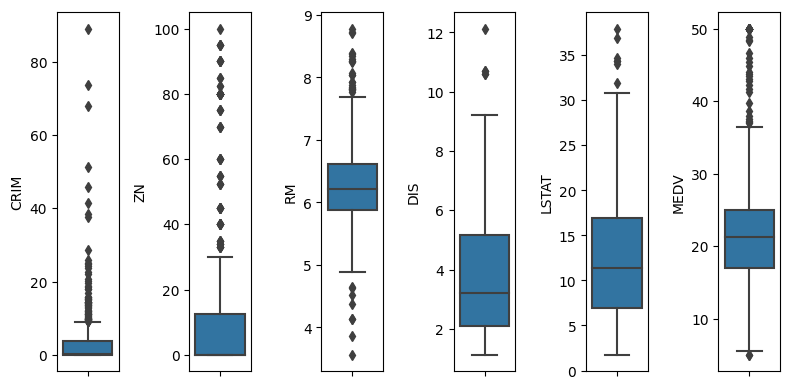

In [9]:
fig, axes = plt.subplots(1,6, figsize=(8,4))

sns.boxplot(y=data['CRIM'], ax=axes[0])

sns.boxplot(y=data['ZN'], ax=axes[1])

sns.boxplot(y=data['RM'], ax=axes[2])

sns.boxplot(y=data['DIS'], ax=axes[3])

sns.boxplot(y=data['LSTAT'], ax=axes[4])

sns.boxplot(y=data['MEDV'], ax=axes[5])

plt.tight_layout()


* `CRIM`, `ZN` and `LSTAT` illustrate proportion/percentage so we can expect the value range from 0 to 100. Thus, there are no unexpected values out of range and the outliers are reasonable. We should leave them and do not alter them.
* `RM` and `DIS` have all values in reasonable range even they are outliers. So the best practice is keep them and do not touch them.
* `MEDV` illustrates the median house values. In reality, there will be houses that have really high values but also there are houses that are really low values. Thus outliers in `MEDV`can't be considered error in entry and should be kept as it is.


# **3. Analyze Stage**
---

## **3.1. Explore target variable: `MEDV`**
---

### ***3.1.1. Explore distribution in `MEDV`***
---

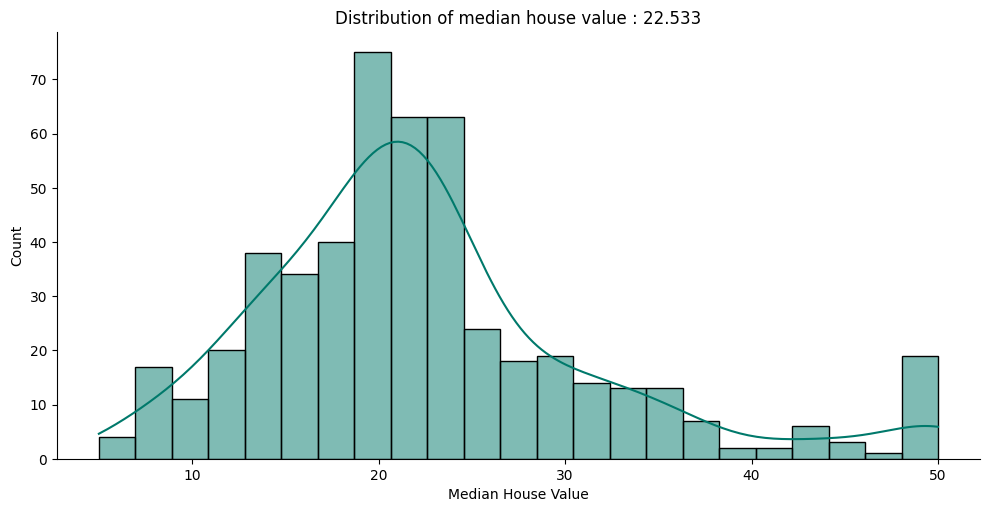

In [10]:
#Visualize the `MEDV` distribution
sns.displot(data['MEDV'],
            aspect=2,
            kde=True,
            color='#00796b')

plt.title(f"Distribution of median house value : {data['MEDV'].mean():.5}")
plt.xlabel('Median House Value')

plt.show()

Most of median home values are range from *\$15,000* to *\$25,000*. We also see that we have adquate number of observations at the right tail of the plot.

In [11]:
#Get value_counts of `MEDV`
data['MEDV'].value_counts()

50.00000    16
25.00000     8
22.00000     7
21.70000     7
23.10000     7
            ..
32.90000     1
34.60000     1
30.30000     1
33.30000     1
8.10000      1
Name: MEDV, Length: 229, dtype: int64

We can see that 16 observations have `MEDV` value of 50 (maximum value of `MEDV` column) which are the most `MEDV` values appear in the dataset. So questions need to be raise:
* What characteristics do these observations have the same to make them have same value?
* Are these observation an entry mistakes or are there any cap value when enter value for `MEDV`?

### ***3.1.2. Explore observations that have the highest `MEDV`***
---

In [12]:
#Filter data to have `MEDV` value of 50
df_max_medv = data[data['MEDV'] == 50]
#Describe the
df_max_medv.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,16.00000,16.00000,16.00000,16.00000,16.00000,16.00000,16.00000,16.00000,16.00000,16.00000,16.00000,16.00000,16.00000,16.00000
mean,2.70341,19.06250,11.86062,0.37500,0.56657,7.48400,77.63750,2.58609,10.62500,415.43750,16.48125,381.74312,4.35500,50.00000
std,3.14523,35.12923,8.18794,0.50000,0.08959,1.06234,26.93461,1.59290,9.41541,188.20165,2.88056,12.92062,2.32122,0.00000
min,0.01381,0.00000,0.46000,0.00000,0.40100,4.97000,24.80000,1.12960,1.00000,193.00000,13.00000,347.88000,1.73000,50.00000
25%,0.40920,0.00000,3.64750,0.00000,0.50000,6.93275,63.65000,1.35065,4.75000,261.75000,14.62500,375.10500,2.96750,50.00000
50%,1.49119,0.00000,18.10000,0.00000,0.60500,7.85300,90.20000,2.04330,5.00000,403.00000,14.70000,386.49500,3.51000,50.00000
75%,5.09116,20.00000,18.47000,1.00000,0.63100,8.09975,96.97500,2.97060,24.00000,666.00000,20.20000,390.92500,4.75250,50.00000
max,9.23230,95.00000,19.58000,1.00000,0.66800,8.72500,100.00000,5.88500,24.00000,666.00000,20.20000,395.52000,9.53000,50.00000


There are no clear pattern that make these observations have same value of 50. So my guess is a cap value was imputed during data collecting or there is any missing variables that they share same  characteristic which make their values equal.

Next, we should check if there are any characteristics that are shared among observations are outliers of `MEDV`.

### ***3.1.3. Explore outliers of `MEDV`***
---

#### *3.1.3.1. Compute the upper and lower limit*
---

In [13]:
#Check the outliers of the `MEDV` column
medv_q1 = data['MEDV'].quantile(0.25)
medv_q3 = data['MEDV'].quantile(0.75)
#compute the iqr
medv_iqr = medv_q3 - medv_q1
#Define upper and lower limit
medv_upper = medv_q3 + (1.5*medv_iqr)
medv_lower = medv_q1 - (1.5*medv_iqr)
#print the result
print(medv_q1)
print(medv_q3)
print(medv_upper)
print(medv_lower)

17.025
25.0
36.962500000000006
5.0624999999999964


#### *3.1.3.2. Filter lower outlier dataset*
---

In [14]:
#Check the `MEDV` below the lower limit
lower_outlier_df = data[data['MEDV']<medv_lower]
#Check how many observations in the lower limit data
print(f"There are {len(lower_outlier_df)} in the lower limit dataset")
#Describe the data
lower_outlier_df

There are 2 in the lower limit dataset


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
398,38.35180,0.00000,18.10000,0,0.69300,5.45300,100.00000,1.48960,24,666,20.20000,396.90000,30.59000,5.00000
405,67.92080,0.00000,18.10000,0,0.69300,5.68300,100.00000,1.42540,24,666,20.20000,384.97000,22.98000,5.00000


From the preceding table, we can see:
* They have same `MEDV` value. Will it be because of lower cap was imputed during data collecting  as well?
* `CRIM` value is high. If we look back the statiscal data of dataset, their value is in 75th percentile at least.
* `ZN` is 0 for both observations, which means there are no residential land zoned. Is it one of the reason to affect to low median house value?
* `INDUS`, `NOX`, `TAX` and `PTRATIO` are the same and is in 75th percentile of whole dataset.
* `DIS` values fall in 25% lower section of whole dataset
* Both have maximum value of `RAD`
* `LSTAT` are high and is in 75th percentile at least.

#### *3.1.3.3. Filter upper outlier dataset*
---

In [15]:
#Check the `MEDV` above the upper limit
upper_outlier_df = data[data['MEDV']>medv_upper]
#Check how many observations in the lower limit data
print(f"There are {len(upper_outlier_df)} in the upper limit dataset")
#Describe the data
upper_outlier_df.describe()

There are 38 in the upper limit dataset


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,38.00000,38.00000,38.00000,38.00000,38.00000,38.00000,38.00000,38.00000,38.00000,38.00000,38.00000,38.00000,38.00000,38.00000
mean,1.29212,21.56579,7.75763,0.18421,0.52129,7.61000,65.79737,3.44541,7.31579,334.97368,16.37895,385.23737,4.27395,45.69737
std,2.35494,33.48743,6.86844,0.39286,0.08841,0.76955,29.45279,1.82579,6.83040,145.85526,2.35512,10.91099,1.78106,4.71980
min,0.01381,0.00000,0.46000,0.00000,0.39400,4.97000,8.40000,1.12960,1.00000,193.00000,13.00000,347.88000,1.73000,37.00000
25%,0.06244,0.00000,2.89000,0.00000,0.44290,7.22975,34.87500,2.06937,4.00000,244.25000,14.70000,377.99750,3.13750,42.42500
50%,0.35020,0.00000,3.97000,0.00000,0.50400,7.81100,74.65000,2.89440,5.00000,291.50000,16.65000,387.87500,3.74500,47.50000
75%,1.07057,20.00000,15.12500,0.00000,0.60500,8.06175,91.32500,5.01120,8.00000,401.75000,17.80000,393.34250,4.77250,50.00000
max,9.23230,95.00000,19.58000,1.00000,0.66800,8.72500,100.00000,8.90670,24.00000,666.00000,20.20000,396.90000,9.53000,50.00000


From upler limit dataset table, we can see that values of each variables are distributed widely and do not concentrate in any percentile of whole dataset like the lower limit dataset. That suggests there are no main features affecting the house values and most of features are correlated to make up the price of property.

### ***3.1.4. Summary***
---
* There might be a capped value at `MEDV` column when the highest value is the one appears the most in the column.
* Most of values are in range from *\$15,000* to *\$25,000*.
* These features `CRIM`, `INDUS`, `NOX`, `TAX`, `PTRATIO`, `DIS`,`RAD` and `LSTAT` may have some relationship with `MEDV` when we investigated the lower outlier dataset of `MEDV`.
* There are no clear pattern that made up high value of property when we investigated the upper outlier dataset. It suggests that the high value was made up by combination of multiple features, not solely depending any particular feature. Therefore, a **multiple regression model** would be a good choice for this project


## **3.2. Explore relationship of independent variables and target variable**
---

### ***3.2.1. Create plot to see the relationship***
---

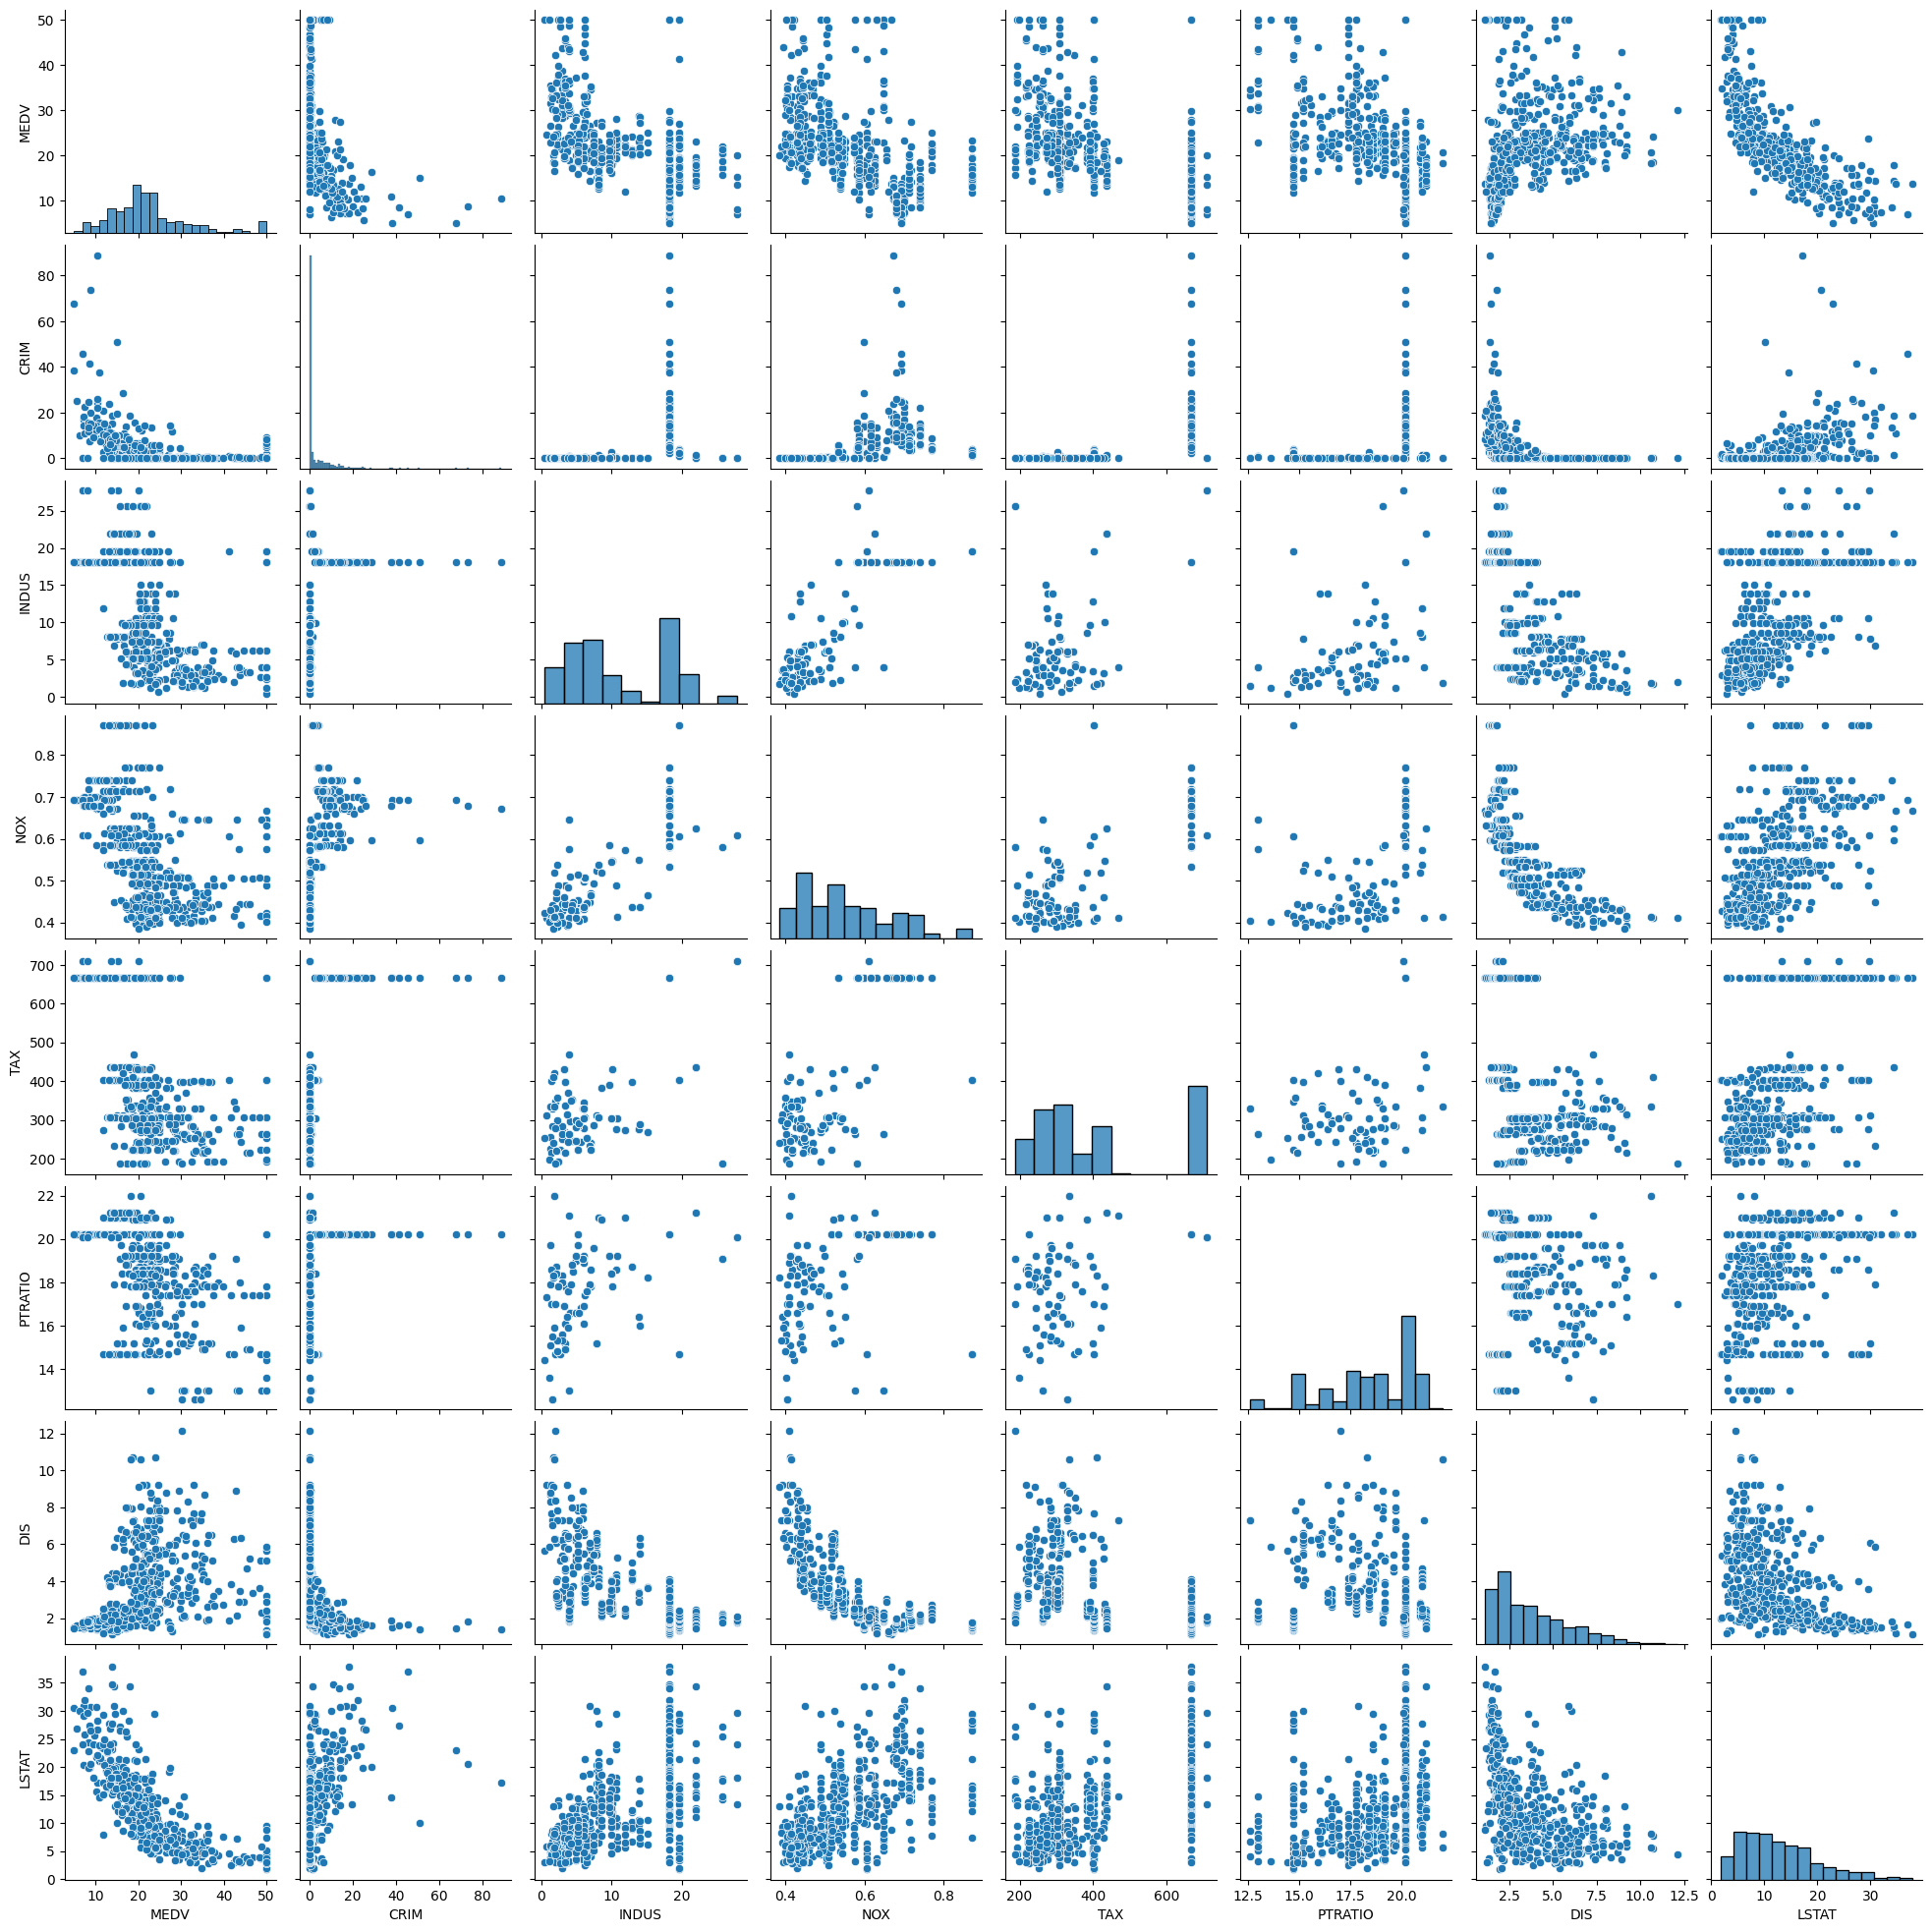

In [ ]:
#Create pairplot to check relationship between mentioned variables above with `MEDV`
sns.pairplot(data=data[['MEDV','CRIM','INDUS','NOX','TAX','PTRATIO','DIS','LSTAT']])

According to preceding plot, we can see there only `LSTAT` has linear relationship with `MEDV`. Other variables don't show a linear relationship with target variable.


### ***3.2.2. Checking relationship between `MEDV` and `RAD`***
---

Pairplot is only good to illustrate relationship between continuos variables. `RAD` is discrete variables (integer), so we can check the relationship with `MEDV` by caculating the mean of each value in `RAD`.


In [ ]:
#Calculate the mean of each index in `RAD`
data.groupby('RAD')['MEDV'].mean()

RAD
1    24.36500
2    26.83333
3    27.92895
4    21.38727
5    25.70696
6    20.97692
7    27.10588
8    30.35833
24   16.40379
Name: MEDV, dtype: float64

Each index in `RAD` has different mean `MEDV`, but the variation is not substantial. Thus, `RAD` is not a good predictor for `MEDV`

### ***3.2.3. Conclusion***
---

There is only `LSTAT` showing linear relationship with our target variable: `MEDV`. If we choose other variables, the linearity assumption would be violated. Therefore, `LSTAT` is the first independent variable we choose to construct the multiple regression model

## **3.3. Explore independent variable: `CHAS`**
---

In the dataset, even though `CHAS` dtype is integer, but it only takes value 0 or 1. This indicates the boolean whether or not the suburd next to the Charles River:

* **0**: The suburd is not next to Charles River
* **1**: The suburd is next to Charles River


As a common sense, properties usually have higher value when they are next to River than others. Would it remains true in this dataset, we should check further.

### ***3.3.1. Check the mean `MEDV` value between 2 groups***
---

In [ ]:
#How many observations next to Charles River
data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
#Mean `MEDV` of observations that next to Charles River and that are not
data.groupby('CHAS')['MEDV'].mean()

CHAS
0   22.09384
1   28.44000
Name: MEDV, dtype: float64

Base on the averages shown, it appears that houses next to Charles River have higher value than houses are not next to Charles River.

However, this difference might arise from random sampling, rather than being a true different in house value. We will conduct hypothesis test to confirm this matter.

### ***3.3.2. Hypotheses testing***
---

**Null hypothesis:** There is no difference in the house value between houses are next to Charles River and house are not.

**Alternative hypothesis:** There is a difference in the house value between houses are next to Charles River and houses are not.

**Significant level:** 5%

In [ ]:
#Hypothesis test, A/B test
#Significant level
chas_df = data[data['CHAS']==1]['MEDV']
no_chas_df = data[data['CHAS']==0]['MEDV']
stats.ttest_ind(a=chas_df, b=no_chas_df, equal_var=False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

pvalue is a lot smaller than the significant level of 5%, we will reject the null hypothesis.

Therefore, we can conclude that there is a statiscally significant difference in the median house value between suburd areas that are next to Charles River and that are not.

### ***3.3.2. Conclusion***
---

After doing hypotheses testing, we are confident to say that `CHAS` feature is one of a good predictor for the `MEDV`. Hences, `CHAS` is the second independent variable we choose for our model.

## **3.4. Explore independent variable: `RM`**
---

Although when we investigated the `MEDV`, we couldn't see the relationship between `RM` and `MEDV`, but in reality, number of rooms in property always plays vital role in determining the value of that property. So, exploring this variable is neccessary to confirm if `RM` can affect to `MEDV`.

### ***3.4.1. Create plot to visualize the relationship***
---

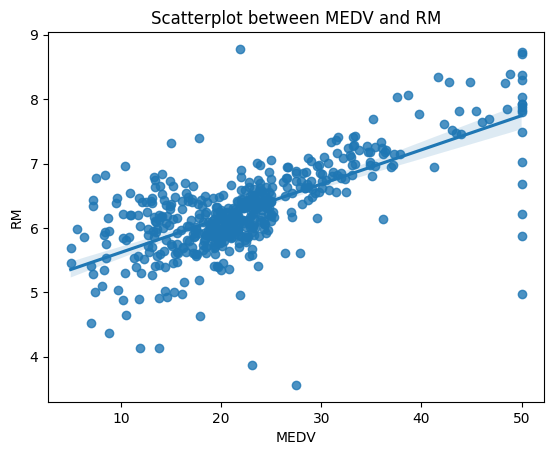

In [ ]:
#Create regplot between `RM` and `MEDV`
sns.regplot(data=data, x='MEDV', y='RM')
plt.title('Scatterplot between MEDV and RM')
plt.show()

The preceding plot shows that `RM` and `MEDV` likely have a linear relationship, even though it is not as strong as `LSTAT` to `MEDV`.


### ***3.4.2. Conclusion***
---

`RM` shows a linear relationship with `MEDV` which meets the linearity assumption when we use this feature as an indepent variable for our model.

# **4. Construct Stage**
---

## **4.1 Review project goal and chosen model**
---

### ***4.1.1. Review project goal***
---

Our project goal is to build a predictive model to help the real estate company estimate the house values in Boston suburds in 70s. It will help them have better understanding of the property they work with so they can be more proactive in buying or selling.

### ***4.1.2. Identify the type of models for this project***
---

Since the target variable: `MEDV` is a continuous variable and multiple independent variables together impact the target variable, **a Multiple Regression Model** would be the most appropriate for this project.

## **4.2 Construct Multiple Regression Model**
---

### ***4.2.1. Features Selection***
---

As we did EDA above, we can see `RM`, `LSTAT` and `CHAS` have linear relationship with `MEDV`. Choosing these features will ensure the model doesn't violate the linearity assumption.

Therefore, our model will be built using these 3 features as independent variables.

In [17]:
#Create dataframe only contains chosen independent and dependent variables.
df = data[['LSTAT','RM','CHAS','MEDV']]

df.head()

,LSTAT,RM,CHAS,MEDV
0,4.98000,6.57500,0,24.00000
1,9.14000,6.42100,0,21.60000
2,4.03000,7.18500,0,34.70000
3,2.94000,6.99800,0,33.40000
4,5.33000,7.14700,0,36.20000


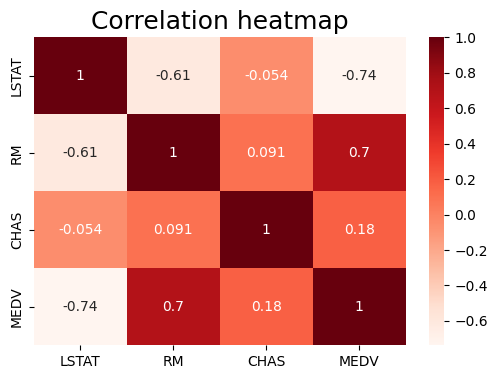

In [18]:
#Identify the correlation by creating correlation heatmap, using pearson correlation coefficient
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap', fontsize=18)
plt.show()

* `MEDV` and `CHAS` are lowly correlated, however as we checked and did hypotheses test above, we know that `CHAS` indeed affects house value.
* `RM` and `LSTAT` are both having adequate correlation with the target variable of `MEDV`.
* `LSTAT` and `RM` also have some moderate correlation with each other. In order to not violate no multicollinearity assumption, we should investigate further the relationship between `RM` and `LSTAT` and calculating the **VIF** to ensure we can both choose these 2 features for our model.


### ***4.2.2. Check relationship between `RM` and `LSTAT`***
---

#### *4.2.2.1. Plot to visualize the relationship*
---

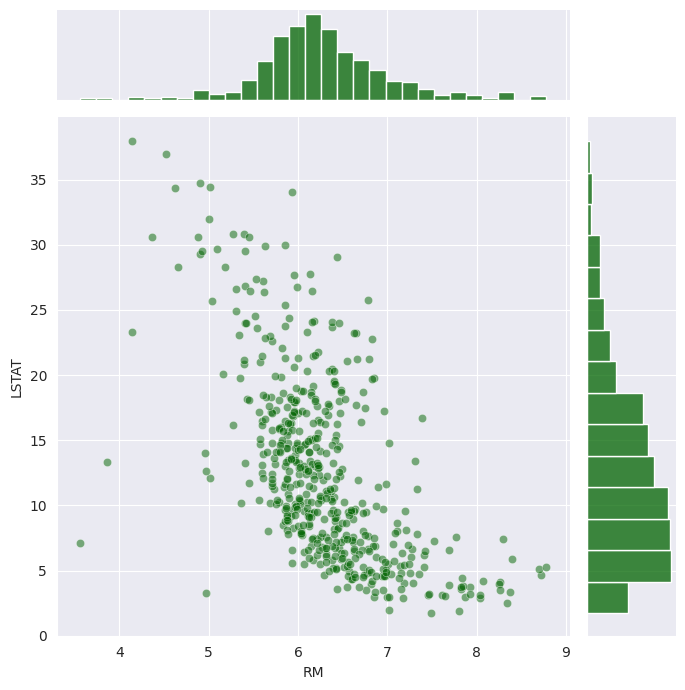

In [ ]:
#Create a jointplot between `RM` and `LSTAT`
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df['RM'],
                y=df['LSTAT'],
                height=7,
                color='darkgreen',
                joint_kws={'alpha':0.5})
plt.show()

Both features do have relationship but it is not a clear linear relationship.

#### *4.2.2.2. VIF checking*
---

In [ ]:
#Calculate the variance inflation factor
##Create a subset of the data with the continuos independent variables.
C = df[['RM','LSTAT']]

##Calculate the variance inflation factor for each variable
vif = [variance_inflation_factor(C.values,i) for i in range(C.shape[1])]

##Create a DataFrame with the VIF results for the column names in C.
df_vif = pd.DataFrame(vif, index=C.columns, columns=['VIF'])

##Display the VIF results
df_vif

,VIF
RM,3.25335
LSTAT,3.25335


The variance inflation factor of `RM` and `LSTAT` is 3.25 which is not too high that will violate no multicollinearity assumption when we put both of them into regression model.

### ***4.2.3. Prepare dataset and spliting for test and training***
---

#### *4.2.3.1. Split dataset into X and y*
---

In [19]:
#Remove the target column from the features
X = df.drop(columns=['MEDV'])

#Set y variable
y = df[['MEDV']]

#Display first few rows of X and y
print(X.head())
print(y.head())

    LSTAT      RM  CHAS
0 4.98000 6.57500     0
1 9.14000 6.42100     0
2 4.03000 7.18500     0
3 2.94000 6.99800     0
4 5.33000 7.14700     0
      MEDV
0 24.00000
1 21.60000
2 34.70000
3 33.40000
4 36.20000


In [20]:
#Check the balance of `CHAS` feature
X[['CHAS']].value_counts(normalize=True)

CHAS
0      0.93083
1      0.06917
dtype: float64

As we can see, `CHAS` is really imbalanced, so we should use **stratify** parameter when split to train and test sets.

#### *4.2.3.3. Split datasets into training and test sets*
---

In [21]:
#Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X.CHAS, random_state=0)

#Check X_train and X_test shape
print(X_train.shape)
print(X_test.shape)

#Check `CHAS` distribution in X_train and X_test
print(X_train['CHAS'].value_counts(normalize=True))
print(X_test['CHAS'].value_counts(normalize=True))

(404, 3)
(102, 3)
0   0.93069
1   0.06931
Name: CHAS, dtype: float64
0   0.93137
1   0.06863
Name: CHAS, dtype: float64


### ***4.2.4. Model Building***
---

#### *4.2.4.1. Fit the model*
---

In [22]:
#Set variable for Linear Regression
lr = LinearRegression()

In [23]:
#Fit the model to the training data
lr.fit(X_train, y_train)

LinearRegression()

#### *4.2.4.2. Evaluate the model*
---

In [27]:
#Train data

##Evaluate the model performance on training data
r_sq_train = lr.score(X_train, y_train)
y_pred_train = lr.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

#Display the the results in DataFrame
results_train = pd.DataFrame({'Model': 'Model_1_train',
                          'R square': [r_sq_train],
                          'MAE': [mae_train],
                          'MSE': [mse_train],
                          'RMSE': [rmse_train]})
results_train

,Model,R square,MAE,MSE,RMSE
0,Model_1_train,0.66988,3.69835,27.28300,5.22331


In [28]:
#Test data

##Evaluate the model performance on training data
r_sq_test = lr.score(X_test, y_test)
y_pred_test = lr.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

#Display the the results in DataFrame
results_test = pd.DataFrame({'Model': 'Model_1_test',
                          'R square': [r_sq_test],
                          'MAE': [mae_test],
                          'MSE': [mse_test],
                          'RMSE': [rmse_test]})
results_test

,Model,R square,MAE,MSE,RMSE
0,Model_1_test,0.57355,4.36836,38.73892,6.22406


In [29]:
#Concat all results into table
results = pd.concat([results_train, results_test], axis=0)
results

,Model,R square,MAE,MSE,RMSE
0,Model_1_train,0.66988,3.69835,27.28300,5.22331
0,Model_1_test,0.57355,4.36836,38.73892,6.22406


The model perform well on training data than on test data which suggests that the model having high variance.

In training data, $R^2$ has value of 0.66988 which means that 66.99% of the variance in the `MEDV` variable is described by the model.

#### *4.2.4.3. Compute the residuals of model*
---

In [30]:
#Create results dataframe for training set
residual_train = pd.DataFrame(data={'actual': y_train['MEDV'],
                             'predicted': y_pred_train.ravel()})
residual_train['residual'] = residual_train['actual'] - residual_train['predicted']

#Create results dataframe for test set
residual_test = pd.DataFrame(data={'actual': y_test['MEDV'],
                                  'predicted': y_pred_test.ravel()})
residual_test['residual'] = residual_test['actual'] - residual_test['predicted']

#Display DataFrame
print(residual_train)
print(residual_test)

      actual  predicted  residual
64  33.00000   29.31131   3.68869
24  15.60000   17.82075  -2.22075
379 10.20000   16.14954  -5.94954
479 21.40000   21.43098  -0.03098
325 24.60000   27.40406  -2.80406
..       ...        ...       ...
455 14.10000   20.02172  -5.92172
59  19.60000   22.12316  -2.52316
417 10.40000    8.14804   2.25196
140 14.00000   14.43904  -0.43904
493 21.80000   19.22304   2.57696

[404 rows x 3 columns]
      actual  predicted  residual
283 50.00000   40.56022   9.43978
119 19.30000   18.38660   0.91340
39  30.80000   28.76701   2.03299
445 11.80000   16.11705  -4.31705
458 14.90000   19.93867  -5.03867
..       ...        ...       ...
394 12.70000   17.58678  -4.88678
144 11.80000    4.33619   7.46381
490  8.10000    5.14613   2.95387
284 32.20000   29.34429   2.85571
439 12.80000   12.20242   0.59758

[102 rows x 3 columns]


#### *4.2.4.4. Check model assumptions*
---

##### **Model assumption: Linearity**

As we checked earlier, all features likely have linear relationship with `MEDV` - target variable.

##### **Model assumption: Independence**

Each observation in dataset was collected independently, thus the independence assumption is not violated.

##### **Model assumption: Normality**

In order to check the **normality assumption**, we will:
 * **Plot 1**: Histogram of residuals
 * **Plot 2**: Q-Q plot of the residuals

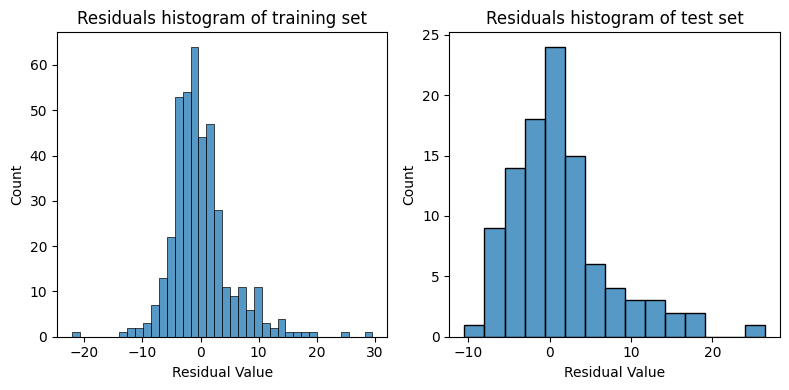

In [31]:
#Visualize `residuals` distribution of training set and test set

##Create a 1x2 plot figure
fig, axes = plt.subplots(1,2, figsize=(8,4))

##Create residuals histogram for training set
sns.histplot(residual_train['residual'], ax=axes[0])
##Set the x label for training set histogram
axes[0].set_xlabel('Residual Value')
##Set the title for first histogram
axes[0].set_title('Residuals histogram of training set')

##Create residuals histogram for test set
sns.histplot(residual_test['residual'], ax=axes[1])
##Set the x label for test set histogram
axes[1].set_xlabel('Residual Value')
##Set the title for the second histogram
axes[1].set_title('Residuals histogram of test set')

#Use tight_layout() for cleaner appearance
plt.tight_layout()

The residuals in training set is likely normal distribution but the residuals in testing set is right skewed which is violating the normality assumption

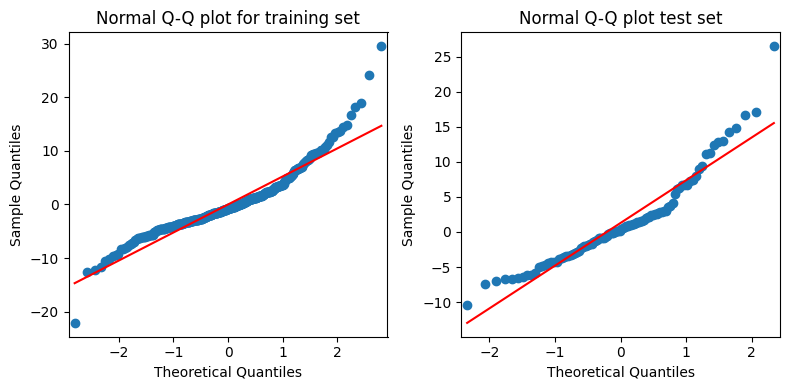

In [32]:
#Create Q-Q plot of the residuals for both training and test set

##Create a 1x2 plot figure
fig, axes = plt.subplots(1,2, figsize=(8,4))

##Create Q-Q plot for training set
sm.qqplot(residual_train['residual'], line='s', ax=axes[0])
##Set the title for first Q-Q plot
axes[0].set_title('Normal Q-Q plot for training set')

##Create Q-Q plot for test set
sm.qqplot(residual_test['residual'], line='s', ax=axes[1])
##Set the title for the second Q-Q plot
axes[1].set_title('Normal Q-Q plot test set')

#Use tight_layout() for cleaner appearance
plt.tight_layout()

Same as histogram above, Q-Q plot of test set is not on straight line but kind of showing the exponential distribution.

##### **Model assumption: Homoscedasticity**

We will create a scatterplot of residuals over predicted to check Homoscedasticity assumption

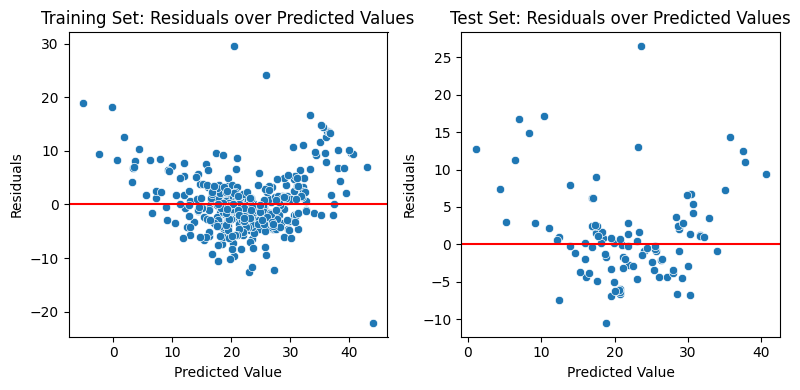

In [33]:
#Create scatterplot of residuals over predicted  of training set and test set

##Create a 1x2 plot figure
fig, axes = plt.subplots(1,2, figsize=(8,4))

##Create residuals over predicted for training set
sns.scatterplot(data = residual_train,
                x= 'predicted',
                y= 'residual',
                ax=axes[0])
##Set the x label for first scatterplot
axes[0].set_xlabel('Predicted Value')
##Set the y label for first scatterplot
axes[0].set_ylabel('Residuals')
##Set the title for first scatterplot
axes[0].set_title('Training Set: Residuals over Predicted Values')
##Add line at y=0
axes[0].axhline(0, c='red')

##Create residuals over predicted for test set
sns.scatterplot(data = residual_test,
                x= 'predicted',
                y= 'residual',
                ax=axes[1])
##Set the x label for second scatterplot
axes[1].set_xlabel('Predicted Value')
##Set the y label for second scatterplot
axes[1].set_ylabel('Residuals')
##Set the title for first scatterplot
axes[1].set_title('Test Set: Residuals over Predicted Values')
##Add line at y=0
axes[1].axhline(0, c='red')

#Use tight_layout() for cleaner appearance
plt.tight_layout()

We can see some patterns existing in those plots above. Residuals below 0 is concentrating in range of 10 to 30 of predicted value. All values outside this range are having positive residuals.
That can conclude the Homoscedasticity assumption is violated.

##### **Model assumption: No Multicollinearity**

By checking the VIF above, we can ensure this assumption is not violated.

#### *4.2.4.5. Model Conclusion*
---

Not only the model performs badly on test set, it also doesn't meet 2 out of 5 assumptions.

One of practice to overcome these 2 assumptions, we can transform the y (target) variable by taking the logarithm and then re-construct the model base on the newly transformed y variable.



### ***4.2.5. Re-construct model with Logarithm transformation***
---

#### *4.2.5.1. Transform y variable*
---

In [34]:
#Create a copy DataFrame
df1 = df.copy()
#Take logarithm of outcome variable: `MEDV`
log_MEDV = np.log(df1[['MEDV']])
#Add log_MEDV as new column
df1['log_MEDV'] = log_MEDV
#Checking first few row of data
df1.head()


,LSTAT,RM,CHAS,MEDV,log_MEDV
0,4.98000,6.57500,0,24.00000,3.17805
1,9.14000,6.42100,0,21.60000,3.07269
2,4.03000,7.18500,0,34.70000,3.54674
3,2.94000,6.99800,0,33.40000,3.50856
4,5.33000,7.14700,0,36.20000,3.58906


#### *4.2.5.2. Set up datasets for X and y*
---

In [35]:
#Remove the target column from the features
X1 = df1.drop(columns=['MEDV','log_MEDV'])

#Set y variable
y1 = df1[['log_MEDV']]

#Display first few rows of X and y
print(X.head())
print(y.head())

    LSTAT      RM  CHAS
0 4.98000 6.57500     0
1 9.14000 6.42100     0
2 4.03000 7.18500     0
3 2.94000 6.99800     0
4 5.33000 7.14700     0
      MEDV
0 24.00000
1 21.60000
2 34.70000
3 33.40000
4 36.20000


#### *4.2.5.3. Split datasets to training and test sets*
---

In [36]:
#Split data to train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, stratify=X.CHAS, random_state=0)

#Check X_train and X_test shape
print(X1_train.shape)
print(X1_test.shape)

#Check `CHAS` distribution in X_train and X_test
print(X1_train['CHAS'].value_counts(normalize=True))
print(X1_test['CHAS'].value_counts(normalize=True))

(404, 3)
(102, 3)
0   0.93069
1   0.06931
Name: CHAS, dtype: float64
0   0.93137
1   0.06863
Name: CHAS, dtype: float64


#### *4.2.5.4. Fit the model*
---

In [37]:
#Fit the model
lr.fit(X1_train, y1_train)

LinearRegression()

#### *4.2.5.5. Evaluate the model*
---

In [38]:
#Train data

##Evaluate the model performance on training data
r_sq_train_1 = lr.score(X1_train, y1_train)
y_pred_train_1 = lr.predict(X1_train)
mae_train_1 = mean_absolute_error(y1_train, y_pred_train_1)
mse_train_1 = mean_squared_error(y1_train, y_pred_train_1)
rmse_train_1 = np.sqrt(mse_train_1)

#Display the the results in DataFrame
results_train_1 = pd.DataFrame({'Model': 'Model_2_train',
                          'R square': [r_sq_train_1],
                          'MAE': [mae_train_1],
                          'MSE': [mse_train_1],
                          'RMSE': [rmse_train_1]})
results_train_1

,Model,R square,MAE,MSE,RMSE
0,Model_2_train,0.70701,0.15796,0.04856,0.22037


In [39]:
#Test data

##Evaluate the model performance on training data
r_sq_test_1 = lr.score(X1_test, y1_test)
y_pred_test_1 = lr.predict(X1_test)
mae_test_1 = mean_absolute_error(y1_test, y_pred_test_1)
mse_test_1 = mean_squared_error(y1_test, y_pred_test_1)
rmse_test_1 = np.sqrt(mse_test_1)

#Display the the results in DataFrame
results_test_1 = pd.DataFrame({'Model': 'Model_2_test',
                          'R square': [r_sq_test_1],
                          'MAE': [mae_test_1],
                          'MSE': [mse_test_1],
                          'RMSE': [rmse_test_1]})
results_test_1

,Model,R square,MAE,MSE,RMSE
0,Model_2_test,0.61190,0.18352,0.06585,0.25661


In [40]:
#Concat all results into table
results = pd.concat([results, results_train_1, results_test_1], axis=0)
results

,Model,R square,MAE,MSE,RMSE
0,Model_1_train,0.66988,3.69835,27.28300,5.22331
0,Model_1_test,0.57355,4.36836,38.73892,6.22406
0,Model_2_train,0.70701,0.15796,0.04856,0.22037
0,Model_2_test,0.61190,0.18352,0.06585,0.25661


The new model has better $R^2$ than the old on in both training and test data. However, the model still performs on training data better than the test data.

#### *4.2.5.6. Compute the residuals of model*
---

In [41]:
#Create results dataframe for training set
residual_train_1 = pd.DataFrame(data={'actual': y1_train['log_MEDV'],
                             'predicted': y_pred_train_1.ravel()})
residual_train_1['residual'] = residual_train_1['actual'] - residual_train_1['predicted']

#Create results dataframe for test set
residual_test_1 = pd.DataFrame(data={'actual': y1_test['log_MEDV'],
                                  'predicted': y_pred_test_1.ravel()})
residual_test_1['residual'] = residual_test_1['actual'] - residual_test_1['predicted']

#Display DataFrame
print(residual_train_1)
print(residual_test_1)

     actual  predicted  residual
64  3.49651    3.30127   0.19524
24  2.74727    2.82478  -0.07751
379 2.32239    2.66011  -0.33773
479 3.06339    2.98781   0.07558
325 3.20275    3.31886  -0.11611
..      ...        ...       ...
455 2.64617    2.84007  -0.19389
59  2.97553    3.09211  -0.11658
417 2.34181    2.34803  -0.00622
140 2.63906    2.56352   0.07554
493 3.08191    2.95608   0.12583

[404 rows x 3 columns]
     actual  predicted  residual
283 3.91202    3.76419   0.14784
119 2.96011    2.89913   0.06098
39  3.42751    3.37051   0.05701
445 2.46810    2.61027  -0.14217
458 2.70136    2.88028  -0.17892
..      ...        ...       ...
394 2.54160    2.81771  -0.27610
144 2.46810    2.19189   0.27621
490 2.09186    2.20383  -0.11197
284 3.47197    3.30656   0.16540
439 2.54945    2.53507   0.01438

[102 rows x 3 columns]


#### *4.2.5.7. Check model assumptions*
---

##### **Model assumption: Linearity**

We will create pairplot to check the linearity assumption between features and new target variable.

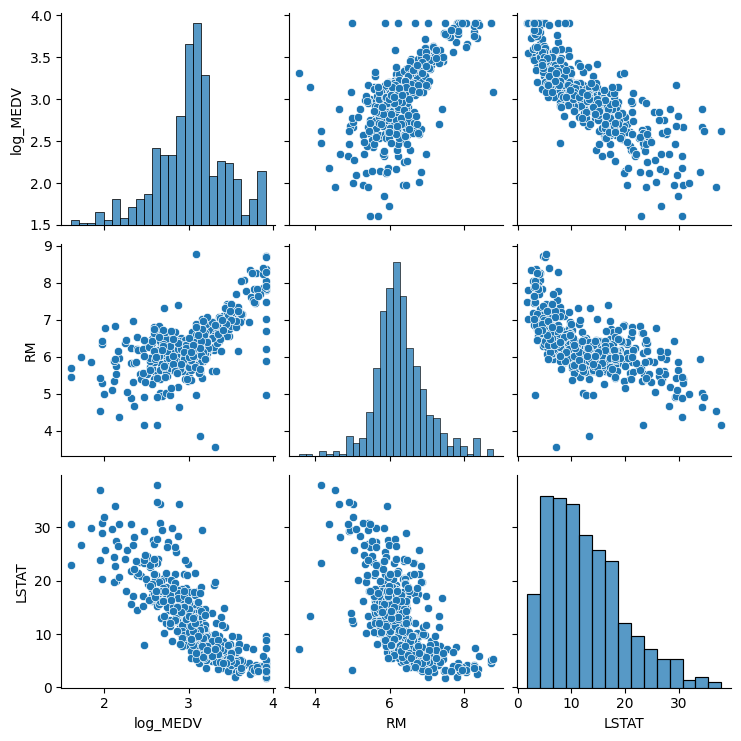

In [ ]:
sns.pairplot(data=df1[['log_MEDV','RM','LSTAT']])

`RM` and `LSTAT` both still remain the linear relationship with the new target variable.

In [ ]:
#Mean `log_MEDV` of observations that next to Charles River and that are not
df1.groupby('CHAS')['log_MEDV'].mean()

CHAS
0   3.01688
1   3.27181
Name: log_MEDV, dtype: float64

###### *Hypothesis testing*

**Null hypothesis:** There is no difference in the house value between houses are next to Charles River and house are not.

**Alternative hypothesis:** There is a difference in the house value between houses are next to Charles River and houses are not.

**Significant level:** 5%

In [ ]:
#Hypothesis test, A/B test
#Significant level
chas_df = df1[df1['CHAS']==1]['log_MEDV']
no_chas_df = df1[df1['CHAS']==0]['log_MEDV']
stats.ttest_ind(a=chas_df, b=no_chas_df, equal_var=False)

TtestResult(statistic=3.744023930549413, pvalue=0.0005735278937587983, df=39.733068234814894)

pvalue is a lot smaller than the significant level of 5%, we will reject the null hypothesis.

Therefore, we can conclude that there is a statiscally significant difference in the logarithm median house value between houses are next to Charles River and houses are not.

##### **Model assumption: Independence**

Each observation in dataset was collected independently, thus the independence assumption is not violated.

##### **Model assumption: Normality**

In order to check the **normality assumption**, we will:
 * **Plot 1**: Histogram of residuals
 * **Plot 2**: Q-Q plot of the residuals

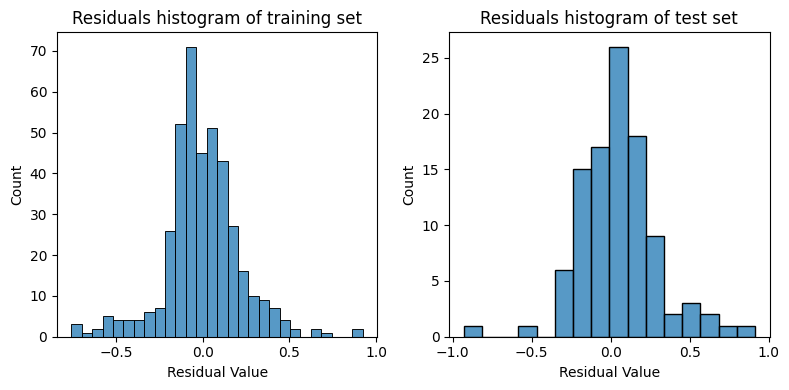

In [42]:
#Visualize `residuals` distribution of training set and test set

##Create a 1x2 plot figure
fig, axes = plt.subplots(1,2, figsize=(8,4))

##Create residuals histogram for training set
sns.histplot(residual_train_1['residual'], ax=axes[0])
##Set the x label for training set histogram
axes[0].set_xlabel('Residual Value')
##Set the title for first histogram
axes[0].set_title('Residuals histogram of training set')

##Create residuals histogram for test set
sns.histplot(residual_test_1['residual'], ax=axes[1])
##Set the x label for test set histogram
axes[1].set_xlabel('Residual Value')
##Set the title for the second histogram
axes[1].set_title('Residuals histogram of test set')

#Use tight_layout() for cleaner appearance
plt.tight_layout()

The distributions of the residuals in training and test sets are approximately normal, confirming that Normality assumption is not violated.

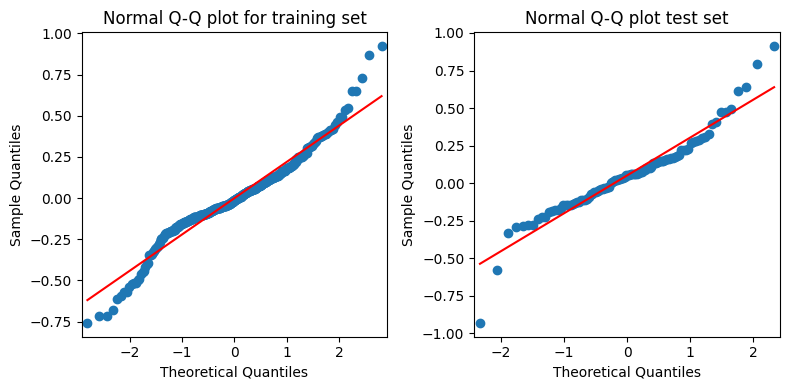

In [43]:
#Create Q-Q plot of the residuals for both training and test set

##Create a 1x2 plot figure
fig, axes = plt.subplots(1,2, figsize=(8,4))

##Create Q-Q plot for training set
sm.qqplot(residual_train_1['residual'], line='s', ax=axes[0])
##Set the title for first Q-Q plot
axes[0].set_title('Normal Q-Q plot for training set')

##Create Q-Q plot for test set
sm.qqplot(residual_test_1['residual'], line='s', ax=axes[1])
##Set the title for the second Q-Q plot
axes[1].set_title('Normal Q-Q plot test set')

#Use tight_layout() for cleaner appearance
plt.tight_layout()

The residuals in the Q-Q plots form approximately straight line, further supporting that this assumption is met.

##### **Model assumption: Homoscedasticity**

We will create a scatterplot of residuals over predicted to check Homoscedasticity assumption

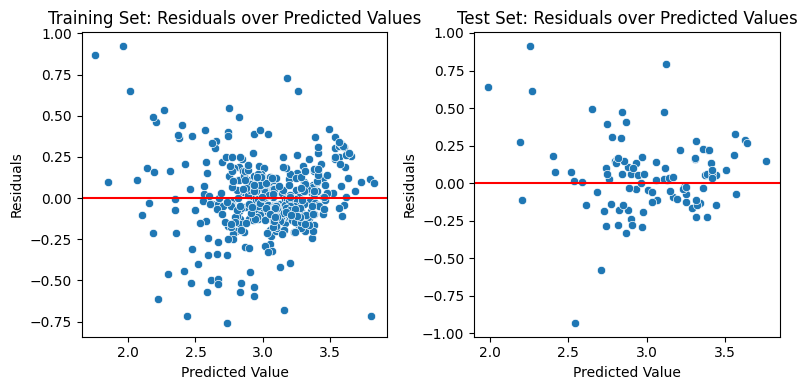

In [ ]:
#Create scatterplot of residuals over predicted  of training set and test set

##Create a 1x2 plot figure
fig, axes = plt.subplots(1,2, figsize=(8,4))

##Create residuals over predicted for training set
sns.scatterplot(data = residual_train_1,
                x= 'predicted',
                y= 'residual',
                ax=axes[0])
##Set the x label for first scatterplot
axes[0].set_xlabel('Predicted Value')
##Set the y label for first scatterplot
axes[0].set_ylabel('Residuals')
##Set the title for first scatterplot
axes[0].set_title('Training Set: Residuals over Predicted Values')
##Add line at y=0
axes[0].axhline(0, c='red')

##Create residuals over predicted for test set
sns.scatterplot(data = residual_test_1,
                x= 'predicted',
                y= 'residual',
                ax=axes[1])
##Set the x label for second scatterplot
axes[1].set_xlabel('Predicted Value')
##Set the y label for second scatterplot
axes[1].set_ylabel('Residuals')
##Set the title for first scatterplot
axes[1].set_title('Test Set: Residuals over Predicted Values')
##Add line at y=0
axes[1].axhline(0, c='red')

#Use tight_layout() for cleaner appearance
plt.tight_layout()

In the preceding plots, the data points are randomly distributed and do not follow an explicit pattern. Given that, the homoscedasticity assumption seems to be met.

##### **Model assumption: No Multicollinearity**

By checking the VIF above, we can ensure this assumption is not violated.

#### *4.2.5.8. Model Conclusion*
---
The new re-constructing model performs better than the old model with higher $R^2$ and also meet all assumptions.


##### **Intercept and Coefficients**


In [44]:
#Get model intercept
intercept = lr.intercept_
intercept

array([2.60857468])

In [45]:
#Get model coefficients
coef_1 = pd.DataFrame(lr.coef_, columns= X1.columns)
coef_1

,LSTAT,RM,CHAS
0,-0.03770,0.14023,0.16372


##### **Regression equation and interpretation**

Based on the coefficients above, we can write the the linear equation to show the relationship between Logarithm `MEDV` and independent variables.

**log_MEDV** = 2.609 - 0.038 * *$X_{LSTAT}$* + 0.140 * *$X_{RM}$* + 0.164 * *$X_{CHAS}$*

In order to interpret properly the change of MEDV when one of the features changes and other variables are controlled, we take exponential of the coefficients of each variable

In [46]:
#Calculate the percentage change of `LSTAT`
lstat_change = 1 - np.exp(coef_1['LSTAT'][0])
print(lstat_change)
#Calculate the percentage change of `RM`
rm_change = np.exp(coef_1['RM'][0]) - 1
print(rm_change)
#Calculate the percentage cchange of `CHAS`
chas_change = np.exp(coef_1['CHAS'][0]) - 1
print(chas_change)

0.036997560984031175
0.15053467230359585
0.177888764568797


The actual interpretation for the model will be as following. With controlled other variables:

* For every 1 unit of `LSTAT` increasing, the `MEDV` would be expected to decrease by ~ 4%
* For every 1 unit of `RM` increasing, the `MEDV` would be expected to increase by ~ 15%
* If the property is next to Charles River, the `MEDV` would be expected to increase by ~18%

##### **Visualize model result on test set**

Text(0.5, 1.0, 'Actual vs Predicted')

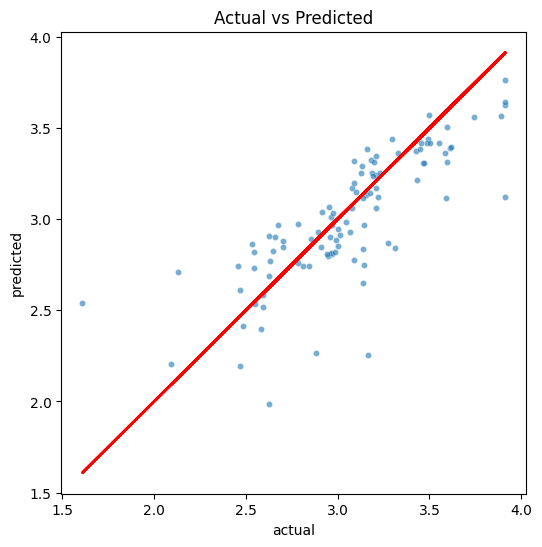

In [47]:
#Create a scatterplot to visualize `predicted` over `actual` on test set
fig, ax = plt.subplots(figsize=(6,6))
sns.set(style='whitegrid')
sns.scatterplot(data=residual_test_1,
                x='actual',
                y='predicted',
                s=20,
                alpha=0.6,
                ax=ax)
#Draw an x=y line to show what the results would be if the model was perfect
plt.plot(y1_test, y1_test, c='red', linewidth=2)
#plot title
plt.title('Actual vs Predicted')

# **5. Final Conclusion**
---

## **5.1 Summary**
---


In [48]:
#show result table
results

,Model,R square,MAE,MSE,RMSE
0,Model_1_train,0.66988,3.69835,27.28300,5.22331
0,Model_1_test,0.57355,4.36836,38.73892,6.22406
0,Model_2_train,0.70701,0.15796,0.04856,0.22037
0,Model_2_test,0.61190,0.18352,0.06585,0.25661


* When we build the model with target variable is `MEDV`, the model only explains 66.99% of the variation in `MEDV` on training sets and it even performs worse on test data when it only can explain 57.36% variation in `MEDV`. It also violates 2 of 5 assumptions which are: Normality and Homoscedasticity.
* By taking logarithm `MEDV` and using that as a target variable, the model performs better on the same data split when it explains 70.70% variation on training set and 61.19% on test sets. In addition, all assumptions are met for this model. In fact, tranforming `MEDV` has improved the model a lot more.
* Regression equation:

  > **log_MEDV** = 2.609 - 0.038 * *$X_{LSTAT}$* + 0.140 * *$X_{RM}$* + 0.164 * *$X_{CHAS}$*

* Model interpretation:
  > For every 1 unit of LSTAT increasing, the MEDV would be expected to decrease by ~ 4%

  > For every 1 unit of RM increasing, the MEDV would be expected to increase by ~ 15%

  > If the property is next to Charles River, the `MEDV` would be expected to increase by ~18%







## **5.2 Conclusion and Consideration**
---

Both models perform not good on test set comparing to training set, it can be because of:
* High variance exists in model. Which means there a lot of unknown variables affected the `MEDV` in Boston in 70s. These unknown variables can be: inflations, goverment policy, public construction, etc.
* Small size of dataset. The dataset has only 506 observations which is small and can lead to overfit issue.

Thus, we will need a bigger dataset, and more variables relating to those suburs in Boston should be collected in order to build more meaningful multiple regression model.
